In [8]:
library(tidyverse)
library(MLmetrics)

In [9]:
pandas = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geopandas_intensive2000.tsv", col_names = c("TID", "pandas")) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  TID = col_character(),
  pandas = col_double()
)


TID,pandas
T42101000332,19.19754
T42101000365,16.92458
T42101000331,16.64821
T42101000315,16.09803
T42101003898,15.26946
T42101000221,15.17521


[1] 367

In [10]:
spark = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geospark_intensive2000.tsv", col_names = c("TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  TID = col_character(),
  spark = col_double()
)


TID,spark
T42101000324,38.12638
T42101000159,21.81991
T42101000160,21.62135
T42101000330,20.78395
T42101000229,20.62140
T42101000184,20.56308


[1] 367

In [4]:
table = pandas %>% left_join(spark, by = c("TID"))
head(table)
nrow(table)

TID,pandas,spark
T42101000332,19.19754,16.99748
T42101000365,16.92458,16.29531
T42101000331,16.64821,18.11994
T42101000315,16.09803,19.90660
T42101003898,15.26946,12.69345
T42101000221,15.17521,14.21019


[1] 367

In [5]:
head(table %>% filter(is.na(spark)))

TID,pandas,spark


In [6]:
table = spark %>% inner_join(pandas, by = c("TID")) %>% 
    mutate(diff = abs(pandas - spark)) %>%
    arrange(desc(diff))
head(table)
nrow(table)

TID,spark,pandas,diff
T42101000324,38.12638,9.2120424,28.91434
T42101000319,19.14920,4.7112466,14.43795
T42101000343,14.74989,0.7165072,14.03339
T42101000159,21.81991,8.3445499,13.47536
T42101000317,16.56036,3.4084088,13.15195
T42101000302,13.28585,0.5018743,12.78397


[1] 367

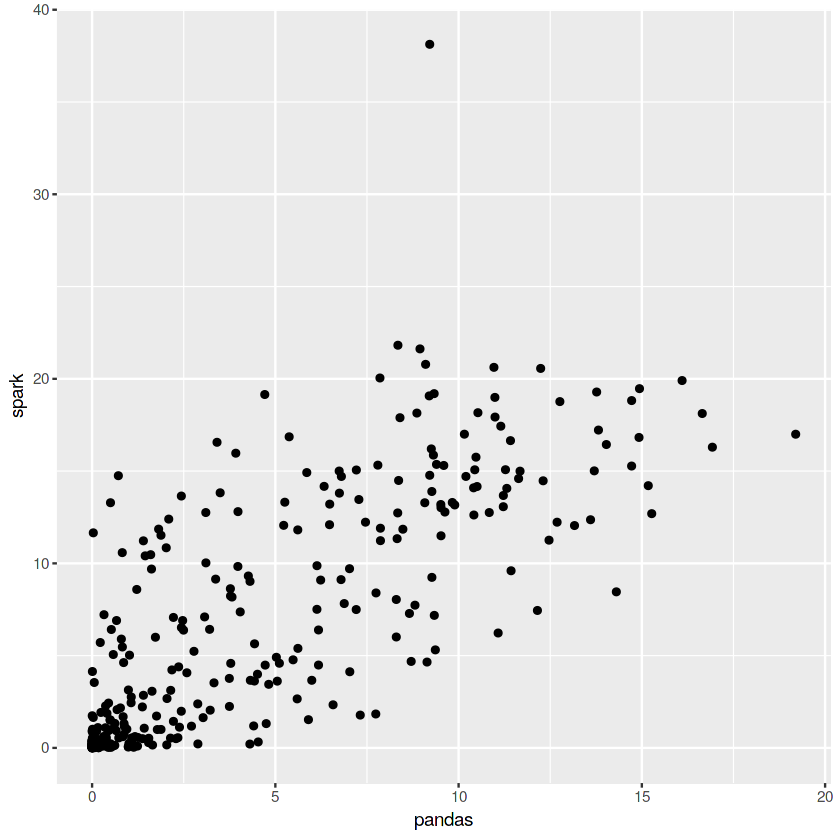

In [7]:
ggplot(data = table, aes(x = pandas, y = spark)) + geom_point()

In [33]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))


[1] "R2:    1"
[1] "MAE:   5.65396621446102e-16"
[1] "MSE:   1.78826492581888e-30"
[1] "RMSE:  1.33726023115132e-15"
[1] "RAE:   1.00231690589527e-16"
